In [1]:
#Acceso a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import sklearn as skl

# Modulo de optimizacion en scipy
from scipy import optimize
import sys

# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [3]:
url = "/content/drive/MyDrive/420/IA-SIS420/defensaLaboratorio /weatherAUS.csv"
dataframe = pd.read_csv(url)
print(dataframe)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [4]:
print(dataframe.describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

cambiar de texto a numerico

In [5]:
from sklearn.preprocessing import OrdinalEncoder
location_cat = dataframe[['Location']]
evaporation_cat = dataframe[['Evaporation']]
sunshine_cat = dataframe[['Sunshine']]
windgustdir_cat = dataframe[['WindGustDir']]
winddr9am_cat = dataframe[['WindDir9am']]
windir3pm_cat = dataframe[['WindDir3pm']]
cloud9am_cat = dataframe[['Cloud9am']]
cloud3pm_cat = dataframe[['Cloud3pm']]
raintoday_cat = dataframe[['RainToday']]
raintomorrow_cat = dataframe[['RainTomorrow']]

print(location_cat.head(10))
print(evaporation_cat.head(10))
print(sunshine_cat.head(10))



  Location
0   Albury
1   Albury
2   Albury
3   Albury
4   Albury
5   Albury
6   Albury
7   Albury
8   Albury
9   Albury
   Evaporation
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
   Sunshine
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN


In [6]:
ordinal_encoder = OrdinalEncoder()
location_cat_encoded = ordinal_encoder.fit_transform(location_cat)
print(location_cat_encoded[:10])
dataframe['Location'] = location_cat_encoded

evaporation_cat_encoded = ordinal_encoder.fit_transform(evaporation_cat)
dataframe['Evaporation'] = evaporation_cat_encoded
print(evaporation_cat_encoded[:10])

sunshine_cat_encoded = ordinal_encoder.fit_transform(sunshine_cat)
dataframe['Sunshine'] = sunshine_cat_encoded
print(sunshine_cat_encoded[:10])


windgusdir_cat_encoded = ordinal_encoder.fit_transform(windgustdir_cat)
print(windgusdir_cat_encoded[:10])
dataframe['WindGustDir'] = windgusdir_cat_encoded

winddir9am_cat_encoded = ordinal_encoder.fit_transform(winddr9am_cat)
dataframe['WindDir9am'] = winddir9am_cat_encoded
print(winddir9am_cat_encoded[:10])

winddir3pm_cat_encoded = ordinal_encoder.fit_transform(windir3pm_cat)
dataframe['WindDir3pm'] = winddir3pm_cat_encoded
print(winddir3pm_cat_encoded[:10])

cloud9am_cat_encoded = ordinal_encoder.fit_transform(cloud9am_cat)
print(cloud9am_cat_encoded[:10])
dataframe['Cloud9am'] = cloud9am_cat_encoded

cloud3pm_cat_encoded = ordinal_encoder.fit_transform(cloud3pm_cat)
dataframe['Cloud3pm'] = cloud3pm_cat_encoded
print(cloud3pm_cat_encoded[:10])

raintoday_cat_encoded = ordinal_encoder.fit_transform(raintoday_cat)
dataframe['RainToday'] = raintoday_cat_encoded
print(raintoday_cat_encoded[:10])

raintomorrow_cat_encoded = ordinal_encoder.fit_transform(raintomorrow_cat)
dataframe['RainTomorrow'] = raintomorrow_cat_encoded
print(raintomorrow_cat_encoded[:10])

[[2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[13.]
 [14.]
 [15.]
 [ 4.]
 [13.]
 [14.]
 [13.]
 [13.]
 [ 6.]
 [13.]]
[[13.]
 [ 6.]
 [13.]
 [ 9.]
 [ 1.]
 [13.]
 [12.]
 [10.]
 [ 9.]
 [ 8.]]
[[14.]
 [15.]
 [15.]
 [ 0.]
 [ 7.]
 [13.]
 [13.]
 [13.]
 [ 7.]
 [10.]]
[[ 8.]
 [nan]
 [nan]
 [nan]
 [ 7.]
 [nan]
 [ 1.]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [ 2.]
 [nan]
 [ 8.]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [7]:
print(dataframe.describe())

            Location        MinTemp        MaxTemp       Rainfall  \
count  145460.000000  143975.000000  144199.000000  142199.000000   
mean       23.793524      12.194034      23.221348       2.360918   
std        14.228687       6.398495       7.119049       8.478060   
min         0.000000      -8.500000      -4.800000       0.000000   
25%        11.000000       7.600000      17.900000       0.000000   
50%        24.000000      12.000000      22.600000       0.000000   
75%        36.000000      16.900000      28.200000       0.800000   
max        48.000000      33.900000      48.100000     371.000000   

        Evaporation      Sunshine    WindGustDir  WindGustSpeed  \
count  82670.000000  75625.000000  135134.000000  135197.000000   
mean      54.003121     76.111762       7.718687      40.035230   
std       37.327508     37.854806       4.662442      13.607062   
min        0.000000      0.000000       0.000000       6.000000   
25%       26.000000     48.000000       3.0

Eliminar las fechas

In [8]:
dataframe_ = dataframe.drop("Date", axis=1)

Reemplazar valores nulos con el valor medio

In [9]:
# Rellenar los valores nulos con el valor medio de cada columna
dataset_sin_nulos = dataframe_.fillna(dataframe_.mean())
print(dataset_sin_nulos)

        Location  MinTemp    MaxTemp  Rainfall  Evaporation   Sunshine  \
0            2.0     13.4  22.900000       0.6    54.003121  76.111762   
1            2.0      7.4  25.100000       0.0    54.003121  76.111762   
2            2.0     12.9  25.700000       0.0    54.003121  76.111762   
3            2.0      9.2  28.000000       0.0    54.003121  76.111762   
4            2.0     17.5  32.300000       1.0    54.003121  76.111762   
...          ...      ...        ...       ...          ...        ...   
145455      41.0      2.8  23.400000       0.0    54.003121  76.111762   
145456      41.0      3.6  25.300000       0.0    54.003121  76.111762   
145457      41.0      5.4  26.900000       0.0    54.003121  76.111762   
145458      41.0      7.8  27.000000       0.0    54.003121  76.111762   
145459      41.0     14.9  23.221348       0.0    54.003121  76.111762   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0         13.000000       44.00

In [10]:
print(dataset_sin_nulos.describe())

            Location        MinTemp        MaxTemp       Rainfall  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       23.793524      12.194034      23.221348       2.360918   
std        14.228687       6.365750       7.088124       8.382488   
min         0.000000      -8.500000      -4.800000       0.000000   
25%        11.000000       7.700000      18.000000       0.000000   
50%        24.000000      12.100000      22.700000       0.000000   
75%        36.000000      16.800000      28.200000       1.000000   
max        48.000000      33.900000      48.100000     371.000000   

         Evaporation       Sunshine    WindGustDir  WindGustSpeed  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       54.003121      76.111762       7.718687      40.035230   
std        28.140385      27.294840       4.493905      13.118253   
min         0.000000       0.000000       0.000000       6.000000   
25%        40.000000      76.1117

In [11]:
dataset = dataset_sin_nulos.drop("RainTomorrow", axis=1)
label = dataset_sin_nulos["RainTomorrow"].copy()

dataset = dataset_sin_nulos.drop(0)
label = dataset_sin_nulos["RainTomorrow"].copy().iloc[1:]

In [12]:
# Cargar datos
datax=dataset.values
datay=label.values
#80% de los datos para entrenamiento y 20% para test
X_train, y_train = datax[:100000, :], datay[:100000:]
X_test, y_test = datax[100000:, :], datay[100000:]
X = X_train
y = y_train
print(X)
print(y)

[[ 2.   7.4 25.1 ... 24.3  0.   0. ]
 [ 2.  12.9 25.7 ... 23.2  0.   0. ]
 [ 2.   9.2 28.  ... 26.5  0.   0. ]
 ...
 [22.   4.3 22.5 ... 21.2  0.   0. ]
 [22.   9.4 21.5 ... 20.5  0.   0. ]
 [22.  10.4 20.1 ... 18.9  0.   0. ]]
[0. 0. 0. ... 0. 0. 0.]


In [13]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [14]:
def  featureNormalize(X):
    #X_norm = X.copy()
    #mu = np.zeros(X.shape[1])
    #sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [15]:
# llama featureNormalize que ya se tiene definido para las anteriores predicciones
X_norm, mu, sigma = featureNormalize(X)

In [16]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [17]:
def calcularCostoReg(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    temp=theta
    temp[0]=0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    return J

In [18]:
def descensoGradienteReg(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        temp=theta
        temp[0]=0
        theta = theta - (alpha / m) * (h - y).dot(X) + (lambda_ / m) * temp

        J_history.append(calcularCostoReg(theta, X, y, lambda_))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 0.00000000e+00 -3.61698362e-02 -2.37103095e-02  2.69229653e-02
  7.75516754e-02  1.26784738e-02 -8.89262089e-02  5.10079109e-03
  1.70483917e-01 -4.38503114e-02 -5.15752076e-03 -3.94004380e-02
 -9.36025217e-02 -1.39228678e-02  2.75642457e-01  2.50755309e-02
 -1.14201230e-01 -2.78311057e-02  4.57595432e-02 -4.91857039e-03
 -1.34484070e-03  5.24148728e-02  5.44511412e+00]


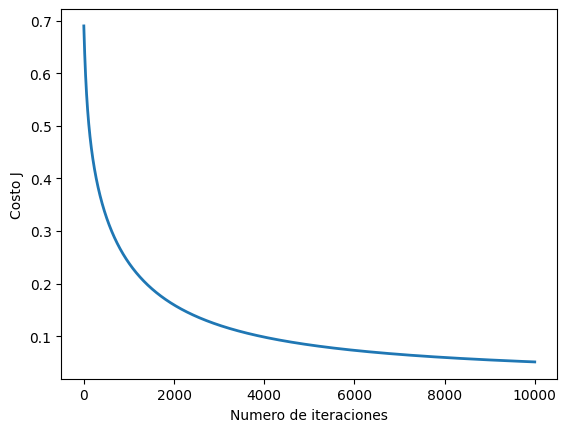

In [19]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000
lambda_ = 0.1 #0.01
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(23)
theta, J_history = descensoGradienteReg(theta, X, y, alpha, num_iters,lambda_)
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [20]:
# Normalizar el conjunto de características de prueba y obtener la media (mu) y la desviación estándar (sigma)
X_test_norm, mu, sigma = featureNormalize(X_test)

# Obtener las dimensiones de la matriz de características normalizadas
m, n = X_test_norm.shape

# Agregar una columna de unos al inicio de la matriz de características normalizadas
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)

#Si llueve mañana o no
llueve= sigmoid(np.dot(X_test_norm, theta))


print(llueve)
print(y_test)

[0.05645268 0.05091916 0.9999652  ... 0.04108112 0.03531792 0.49371064]
[0.         0.         1.         ... 0.         0.         0.22418122]


In [21]:
#Efectividad
llueve[llueve >= 0.5] = 1
llueve[llueve < 0.5] = 0
print(llueve)
print(y_test)
#Porcentaje de acierto
porcentaje = np.mean(llueve == y_test) * 100
print("Porcentaje de acierto:", porcentaje)

[0. 0. 1. ... 0. 0. 0.]
[0.         0.         1.         ... 0.         0.         0.22418122]
Porcentaje de acierto: 98.46015090521128
